In [3]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
from models import Gaussian
from surrogate import NeuralGrad
from sampler import hamiltonian
from block import build
from sklearn import preprocessing

**20 dimensional parameter space and 1000 training points**

In [9]:
d_gaussian = 20
n_training = 1000

**Gaussian distribution with mean 0 and identity covariance matrix**

In [10]:
mu = np.zeros(d_gaussian)
var = np.ones(d_gaussian)
toy = Gaussian(mu, var)

In [11]:
# generate training data
training = toy.sample(n_training)
energy = np.zeros(training.shape[0])
gradient = np.zeros((training.shape[0], training.shape[1]))
for i in range(training.shape[0]):
    energy[i] = toy.energy(training[i, :])
    gradient[i, :] = toy.gradient(training[i, :])

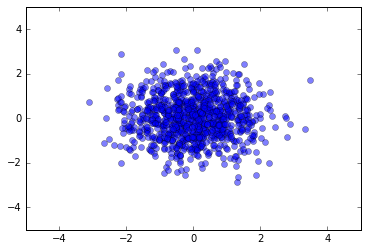

In [14]:
fig = plt.figure(figsize=(6, 4), dpi=200)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.plot(training[:, 0], training[:, 1], 'o', alpha=0.5)

**Train a neural network to approximate the gradient**

In [24]:
scaler = preprocessing.StandardScaler().fit(training)
training = preprocessing.scale(training)
model = build(d_gaussian, [50], [d_gaussian])
model.fit(training, gradient, nb_epoch=10, batch_size=20)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 20)            0                                            
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 50)            1050        input_2[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 20)            1020        dense_3[0][0]                    
Total params: 2,070
Trainable params: 2,070
Non-trainable params: 0
____________________________________________________________________________________________________
Epoch 1/10
1000/1000 [==============================] - 0s - loss: 1.0531     
Epoch 2/10
1000/1000 [=======================

**Use the neural network inside hamiltonian monte carlo to sample points**

In [31]:
gradhat = NeuralGrad(model, scaler)
nnghmc_draws = hamiltonian(toy, 1000, 10, 0.1, gradhat)[0]

100 iterations with acceptance probability 0.76
200 iterations with acceptance probability 0.85
300 iterations with acceptance probability 0.87
400 iterations with acceptance probability 0.74
500 iterations with acceptance probability 0.75
600 iterations with acceptance probability 0.7
700 iterations with acceptance probability 0.77
800 iterations with acceptance probability 0.7
900 iterations with acceptance probability 0.77
1000 iterations with acceptance probability 0.73


**Trace plot shows good convergence**

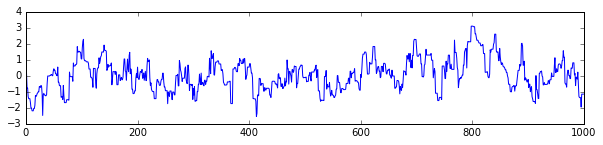

In [32]:
fig = plt.figure(figsize=(10, 2), dpi=200)
plt.plot(nnghmc_draws[:, 0])

**NNgHMC draws seem Gaussian**

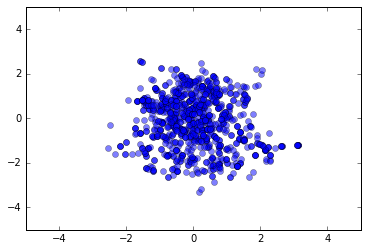

In [35]:
fig = plt.figure(figsize=(6, 4), dpi=200)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.plot(nnghmc_draws[:, 0], nnghmc_draws[:, 1], 'o', alpha=0.5)